In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Chua Circuit

In [2]:
def chuaDiode(x):
    E = 1
    G_a,G_b = [-1.143,-0.714]
    if abs(x)<E:
        return G_a*x
    elif x >= E:
        return G_b*x + (G_a-G_b)
    else:
        return G_b*x - (G_a-G_b)


In [3]:
def chuaCircuit(t, p, a, b):
    x, y, z = p
    return [a*(y-x-chuaDiode(x)), x-y+z, -b*y]

### 3D plot

<IPython.core.display.Javascript object>


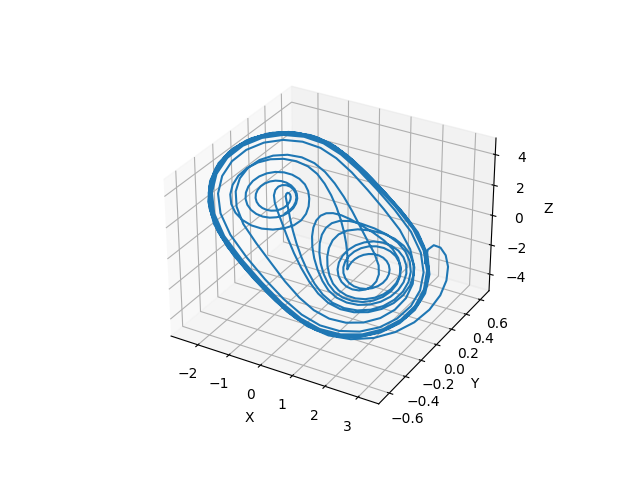

In [10]:
%matplotlib notebook
sol = solve_ivp(chuaCircuit, [0, 100], [3.2041519,0,0], args=[15.6,28],dense_output=True)

t = np.linspace(0, 30, 500)
p = sol.sol(t)
x = p[0]
y = p[1]
z = p[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

###  animated 3D plot changing colours, coarse

<IPython.core.display.Javascript object>


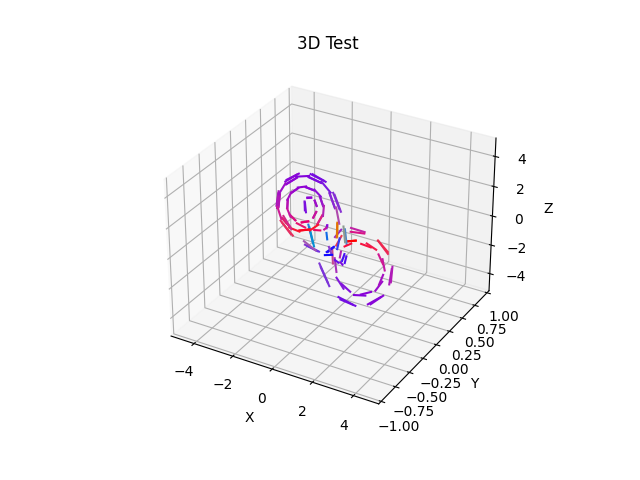

In [11]:
sol = solve_ivp(chuaCircuit, [0, 100], [0.7,0,0], args=[15.6,28],dense_output=True)
t = np.linspace(0, 100, 1000)
p = sol.sol(t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')   

# lines = [ax.plot(sol.sol(0)[0],sol.sol(0)[1],sol.sol(0)[2])]

def update_lines(t,data):
#     t = 0.2*t
    x = data[0,t*2:t*2+2]
    y = data[1,t*2:t*2+2]
    z = data[2,t*2:t*2+2]
    norm = np.linalg.norm([x[0],y[0],z[0]])
#     print(x[0]/norm, y[0]/norm,z[0]/norm)
#     print(x,y,z)
#     print(t)
    return [ax.plot(x, y, z, c=(abs(x[0]/norm),
                                abs(y[0]/norm),
                                abs(z[0]/norm)))]

ax.set_xlim3d([-5, 5])
ax.set_xlabel('X')

ax.set_ylim3d([-1, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-5, 5.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

ani = animation.FuncAnimation(fig, update_lines,  fargs=[p], interval = 50)

# from IPython.display import HTML
# HTML(ani.to_html5_video())
plt.show()

### animated 3D plot, smooth, but same color

<IPython.core.display.Javascript object>


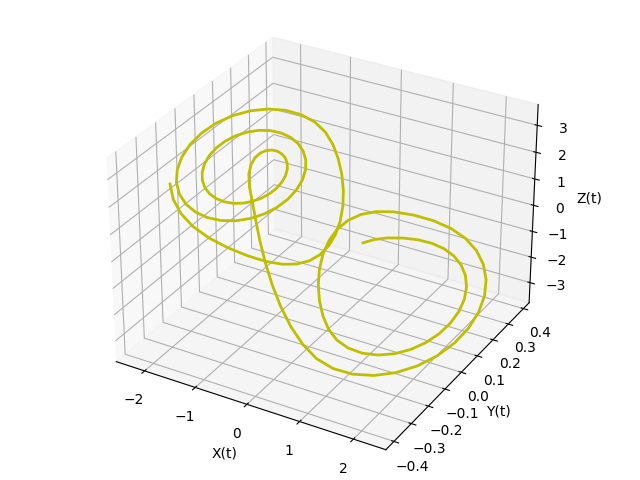

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
 
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])
    return line
 
 
# THE DATA POINTS
sol = solve_ivp(chuaCircuit, [0, 200], [0.7,0,0], args=[15.6,28],dense_output=True)
z = np.linspace(0, 100, 2000)
p = sol.sol(z)
t = p[2] # This would be the z-axis ('t' means time here)
x = p[0]
y = p[1]
dataSet = np.array([x, y, t])
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='y')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Chua Circuit')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, 
                                   fargs=(dataSet,line), interval=30, blit=False)
#line_ani.save(r'AnimationNew.mp4')
 
 
# from IPython.display import HTML
# HTML(line_ani.to_html5_video())
plt.show()

# Lorenz system

In [7]:
def lorenzSystem(t,data):
    x, y, z = data
    sigma = 10
    rho = 28
    beta = 8/3
    return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

### 3D plot

<IPython.core.display.Javascript object>


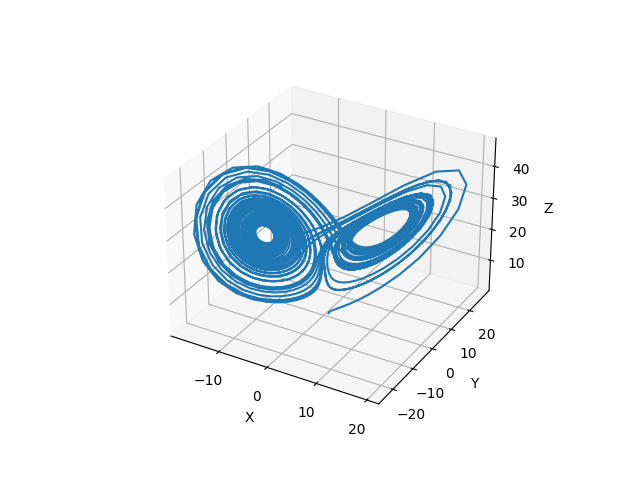

In [8]:
sol = solve_ivp(lorenzSystem, [0, 100], [1,0,1],dense_output=True)

t = np.linspace(0, 50, 2000)
p = sol.sol(t)
x = p[0]
y = p[1]
z = p[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### animated 3D

<IPython.core.display.Javascript object>


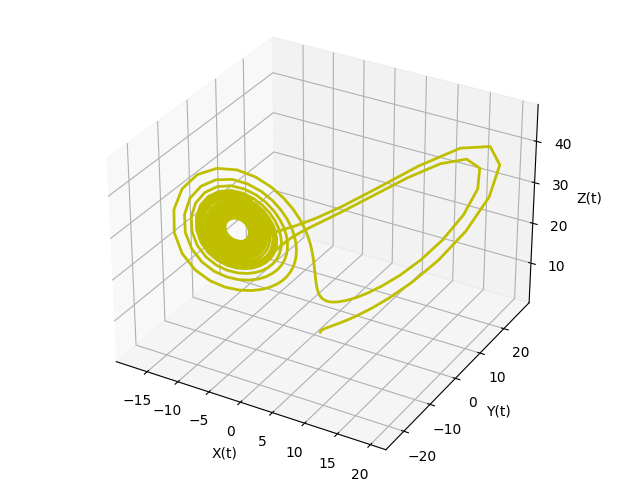

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '100.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp2vexhk1r/temp.m4v']' returned non-zero exit status 255.

In [9]:
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])
    return line
 
 
# THE DATA POINTS
sol = solve_ivp(lorenzSystem, [0, 100], [1,0,1],dense_output=True)
z = np.linspace(0, 100, 4000)
p = sol.sol(z)
t = p[2] # This would be the z-axis ('t' means time here)
x = p[0]
y = p[1]
dataSet = np.array([x, y, t])
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='y')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('Z(t)')
ax.set_title('Chua Circuit')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, 
                                   fargs=(dataSet,line), interval=10, blit=False)
#line_ani.save(r'AnimationNew.mp4')
 
 
from IPython.display import HTML
HTML(line_ani.to_html5_video())
# plt.show()